In [28]:
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

filenames = ['maltrisQL1rstateGraphData.save',
             'maltrisQLGraphData.save',
             'maltrisQL3rstateGraphData2.save',
             'maltrisQLRandomGraphData.save',
             ]
legendNames = ['Q-Learning 1-Row State',
               'Q-Learning 2-Row State',
               'Q-Learning 3-Row State',
               'Random State',
              ]

plotColors = ['r', 'y', 'g', 'b']

In [29]:
#open file and read in variables
filedGamesPlayed = []
filedGameLevels = []
filedGameClears = []
for i in range(0, len(filenames)):
    f2 = open(filenames[i], 'rb')
    gamesPlayed = pickle.load(f2)
    gameLevels = pickle.load(f2)
    gameClears = pickle.load(f2)
    f2.close()
    filedGamesPlayed.append(gamesPlayed-10) #skip first 10 datapoints, noise in data
    filedGameLevels.append(gameLevels[10:])
    filedGameClears.append(gameClears[10:])

In [30]:
#CALCULATE THE AVERAGE GAME LEVELS AND PLTLVLS
filedXvals = []
filedGameLevelAverages = []
filedGameClearAverages = []
for filenum in range(0, len(filenames)):
    xval = []
    lvlavg = []
    clearavg = []
    pltlvlavg = []
    pltclearavg = []
    for i in range(0, filedGamesPlayed[filenum]):
        xval.append(i)
        lvlavg.append(filedGameLevels[filenum][i])
        clearavg.append(filedGameClears[filenum][i])
        pltlvlavg.append(np.mean(lvlavg))
        pltclearavg.append(np.mean(clearavg))
    filedXvals.append(xval[10:]) #skip first 10 datapoints, noise in data
    filedGameLevelAverages.append(pltlvlavg[10:])
    filedGameClearAverages.append(pltclearavg[10:])

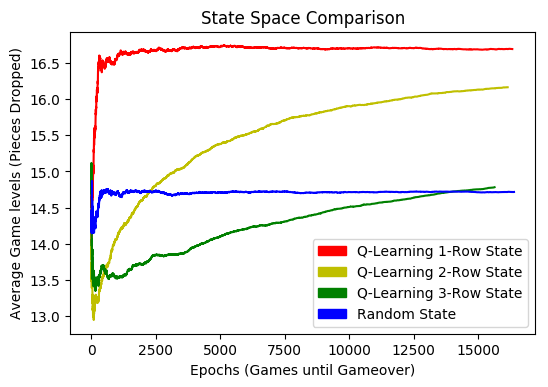

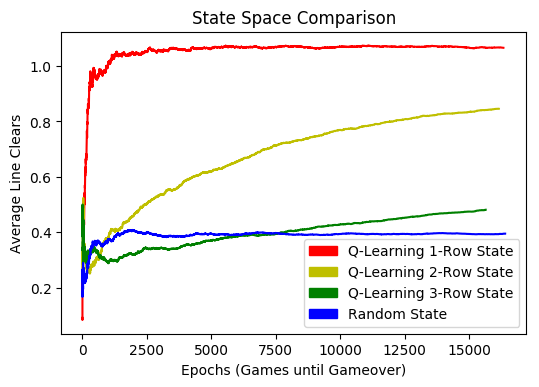

''

In [20]:
''''''''''''''''''
#PLOT ALL THE GAME LEVELS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("State Space Comparison")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Average Game levels (Pieces Dropped)")
for filenum in range(0, len(filenames)):
    legendHandles.append(mpatches.Patch(color=plotColors[filenum], label = legendNames[filenum]))
    plt.plot(filedXvals[filenum], filedGameLevelAverages[filenum], plotColors[filenum])
plt.legend(handles = legendHandles)
plt.savefig('avgLvlPlot.png')
plt.show()
''''''''''''''''''
#PLOT ALL THE GAME CLEARS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("State Space Comparison")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Average Line Clears")
for filenum in range(0, len(filenames)):
    legendHandles.append(mpatches.Patch(color=plotColors[filenum], label = legendNames[filenum]))
    plt.plot(filedXvals[filenum], filedGameClearAverages[filenum], plotColors[filenum])
plt.legend(handles = legendHandles)
plt.savefig('avgClearsPlot.png')
plt.show()
''''''''''''''''''

In [21]:
'''''''GRAPHING THE HEURISTICS TESTS'
filenames2 = ['maltrisQL1rstateGraphData2-20_50-20-100.save',#baseline
              'maltrisQL1rstateGraphData2-20_50-20-100.save',#Filler, uneeded
             #Increasing height
             'maltrisQL1rstateGraphData2-10_50-20-100.save',
             'maltrisQL1rstateGraphData2-50_50-20-100.save',
                
             #lineclears
             'maltrisQL1rstateGraphData2-20_200-20-100.save',
             'maltrisQL1rstateGraphData2-20_300-20-100.save',
             
             #holes
             'maltrisQL1rstateGraphData2-20_50-10-100.save',
             'maltrisQL1rstateGraphData2-20_50-50-100.save',
             
             #top height
             'maltrisQL1rstateGraphData2-20_50-20-50.save',
             'maltrisQL1rstateGraphData2-20_50-20-300.save',
             
             #experimental/combined
             'maltrisQL1rstateGraphData2-10_200-50-300.save',
             'maltrisQL1rstateGraphData2-20_60-20-350.save',
             ]
legendNames = [
               'Baseline',
               'Increasing Height',
               'Line Clears',
               'Holes',
               'Top Height',
               'Experimental',
              ]

plotColors = ['b', 'r', 'g', 'y', 'm', 'c']

#open file and read in variables
filedGamesPlayed = []
filedGameLevels = []
filedGameClears = []
for i in range(0, len(filenames2)):
    f2 = open(filenames2[i], 'rb')
    gamesPlayed = pickle.load(f2)
    gameLevels = pickle.load(f2)
    gameClears = pickle.load(f2)
    f2.close()
    filedGamesPlayed.append(gamesPlayed-10) #skip first 10 datapoints, noise in data
    filedGameLevels.append(gameLevels[10:])
    filedGameClears.append(gameClears[10:])

In [22]:
#CALCULATE THE AVERAGE GAME LEVELS AND PLTLVLS
filedXvals = []
filedGameLevelAverages = []
filedGameClearAverages = []
for filenum in range(0, len(filenames2)):
    xval = []
    lvlavg = []
    clearavg = []
    pltlvlavg = []
    pltclearavg = []
    for i in range(0, filedGamesPlayed[filenum]):
        xval.append(i)
        lvlavg.append(filedGameLevels[filenum][i])
        clearavg.append(filedGameClears[filenum][i])
        pltlvlavg.append(np.mean(lvlavg))
        pltclearavg.append(np.mean(clearavg))
    filedXvals.append(xval[10:]) #skip first 10 datapoints, noise in data
    filedGameLevelAverages.append(pltlvlavg[10:])
    filedGameClearAverages.append(pltclearavg[10:])

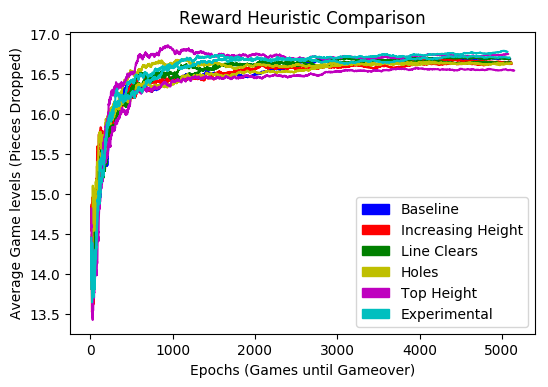

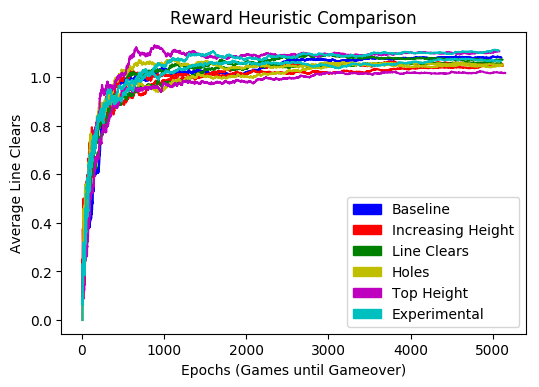

In [23]:
''''''''''''''''''
#PLOT ALL THE GAME LEVELS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("Reward Heuristic Comparison")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Average Game levels (Pieces Dropped)")
for filenum in range(0, len(filenames2)):
    if filenum%2 == 1:
        legendHandles.append(mpatches.Patch(color=plotColors[int(filenum/2)], label = legendNames[int(filenum/2)]))
    plt.plot(filedXvals[filenum], filedGameLevelAverages[filenum], plotColors[int(filenum/2)])
plt.legend(handles = legendHandles)
plt.savefig('rewardlvlPlot.png')
plt.show()

#PLOT ALL THE GAME Line CLEARS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("Reward Heuristic Comparison")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Average Line Clears")
for filenum in range(0, len(filenames2)):
    if filenum%2 == 1:
        legendHandles.append(mpatches.Patch(color=plotColors[int(filenum/2)], label = legendNames[int(filenum/2)]))
    plt.plot(filedXvals[filenum], filedGameClearAverages[filenum], plotColors[int(filenum/2)])
plt.legend(handles = legendHandles)
plt.savefig('rewardclearPlot.png')
plt.show()

In [ ]:
'''''''''''''''''''GRAPH FOR BEST HEURISTIC'
filenames3 = ['maltrisQL1rstateGraphDataBH.save',
             'maltrisQLGraphDataBH.save',
             'maltrisQL3rstateGraphDataBH.save',
             'maltrisQLRandomGraphData.save',
             ]
legendNames = ['Q-Learning 1-Row State',
               'Q-Learning 2-Row State',
               'Q-Learning 3-Row State',
               'Random State',
              ]

plotColors = ['r', 'y', 'g', 'b']
#open file and read in variables
filedGamesPlayed = []
filedGameLevels = []
filedGameClears = []
for i in range(0, len(filenames3)):
    f2 = open(filenames3[i], 'rb')
    gamesPlayed = pickle.load(f2)
    gameLevels = pickle.load(f2)
    gameClears = pickle.load(f2)
    f2.close()
    filedGamesPlayed.append(gamesPlayed-10) #skip first 10 datapoints, noise in data
    filedGameLevels.append(gameLevels[10:])
    filedGameClears.append(gameClears[10:])

FileNotFoundError: [Errno 2] No such file or directory: 'maltrisQL3rstateGraphData2BH.save'

In [35]:
#CALCULATE THE AVERAGE GAME LEVELS AND PLTLVLS
bestfiledXvals = []
bestfiledGameLevelAverages = []
bestfiledGameClearAverages = []
for filenum in range(0, len(filenames3)):
    xval = []
    lvlavg = []
    clearavg = []
    pltlvlavg = []
    pltclearavg = []
    for i in range(0, filedGamesPlayed[filenum]):
        xval.append(i)
        lvlavg.append(filedGameLevels[filenum][i])
        clearavg.append(filedGameClears[filenum][i])
        pltlvlavg.append(np.mean(lvlavg))
        pltclearavg.append(np.mean(clearavg))
    bestfiledXvals.append(xval[10:]) #skip first 10 datapoints, noise in data
    bestfiledGameLevelAverages.append(pltlvlavg[10:])
    bestfiledGameClearAverages.append(pltclearavg[10:])

IndexError: list index out of range

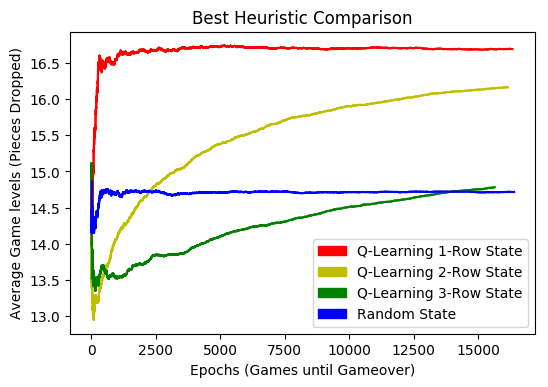

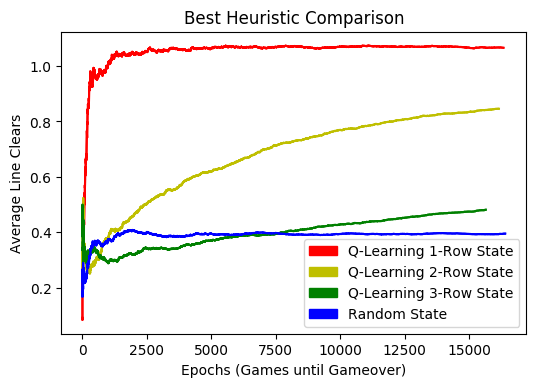

''

In [33]:
''''''''''''''''''
#PLOT ALL THE GAME LEVELS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("Best Heuristic Comparison")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Average Game levels (Pieces Dropped)")
for filenum in range(0, len(filenames)):
    legendHandles.append(mpatches.Patch(color=plotColors[filenum], label = legendNames[filenum]))
    plt.plot(filedXvals[filenum], filedGameLevelAverages[filenum], plotColors[filenum])
for filenum in range(0, len(filenames3)):
    plt.plot(bestfiledXvals[filenum], bestfiledGameLevelAverages[filenum], plotColors[filenum])
plt.legend(handles = legendHandles)
plt.savefig('bestavgLvlPlot.png')
plt.show()
''''''''''''''''''
#PLOT ALL THE GAME CLEARS
legendHandles = []
fig = plt.figure(figsize=(6, 4), dpi=100)
plt.title("Best Heuristic Comparison")
plt.xlabel("Epochs (Games until Gameover)")
plt.ylabel("Average Line Clears")
for filenum in range(0, len(filenames)):
    legendHandles.append(mpatches.Patch(color=plotColors[filenum], label = legendNames[filenum]))
    plt.plot(filedXvals[filenum], filedGameClearAverages[filenum], plotColors[filenum])
for filenum in range(0, len(filenames3)):
    plt.plot(bestfiledXvals[filenum], bestfiledGameClearAverages[filenum], plotColors[filenum])
plt.legend(handles = legendHandles)
plt.savefig('bestavgClearsPlot.png')
plt.show()
''''''''''''''''''